In [214]:
from vega_datasets import data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
style.use("ggplot")

from vega_datasets import data
data.sf_temps()
Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.



In [31]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


<AxesSubplot:xlabel='date'>

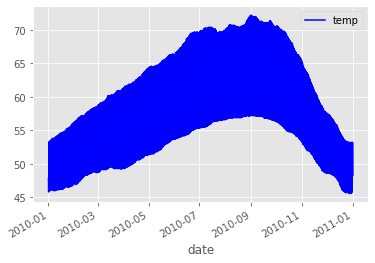

In [32]:
df.plot(x='date', y='temp', color='blue')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [34]:
df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

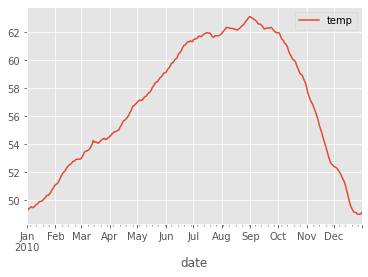

In [35]:
#resample by day and calculate the mean
daily_mean = df.resample('D').mean()
daily_mean.plot()

2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

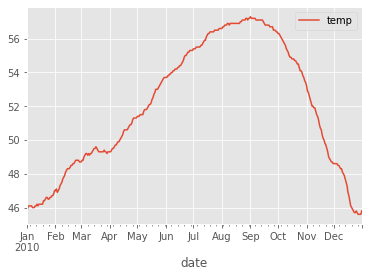

In [36]:
#resample by day and calculate the min
daily_min = df.resample('D').min()
daily_min.plot()

3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

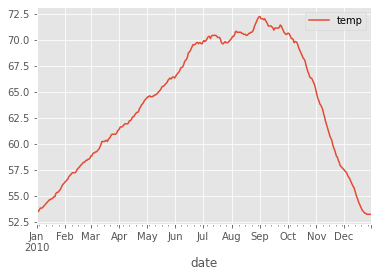

In [37]:
#resample by day and calculate the max
daily_max = df.resample('D').max()
daily_max.plot()

4. Which month is the coldest, on average?


In [38]:
#resample by month and calculate the mean
monthly_mean = df.resample('M').mean()
monthly_mean

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [71]:
#which month has the lowest mean temperature?
monthly_mean.idxmin()[0].strftime("%B"), monthly_mean.min()[0]



('January', 49.98413978494623)

5. Which month has the highest average temperature?


In [72]:
monthly_mean.idxmax()[0].strftime("%B"), monthly_mean.max()[0]

('September', 62.48708333333333)

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [41]:
#resample by day and calculate daily min and max
daily_min_max = df.resample('D').agg({'temp': ['min', 'max']})
daily_min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [42]:
#add column for daily temp range
daily_min_max['range'] = daily_min_max['temp']['max'] - daily_min_max['temp']['min']
daily_min_max.range.max()


15.0

In [64]:
#resample by month and calculate max range
monthly_max_range = daily_min_max.resample('M').max()
monthly_max_range.range.idxmax().strftime("%B"), monthly_max_range.range.max()


('August', 15.0)

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

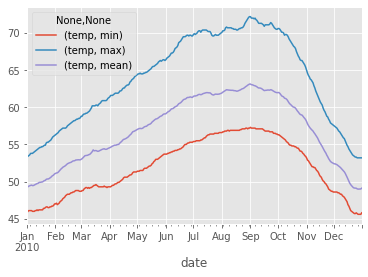

In [44]:
#make new dataframe with min, max, and mean temp for each day
daily_stats = df.resample('D').agg({'temp': ['min', 'max', 'mean']})
daily_stats.plot()

from vega_datasets import data
data.seattle_weather()
Use the dataset to answer the following questions:

In [47]:
df = data.seattle_weather()
df.set_index('date', inplace=True)

1. Which year and month combination has the highest amount of precipitation?


<AxesSubplot:xlabel='date'>

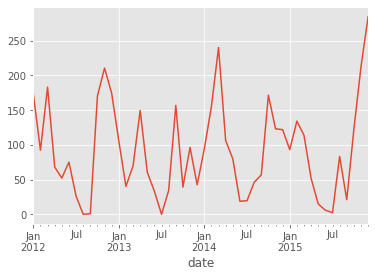

In [52]:
# resample by month and calculate precipitation sum
monthly_precip = df.resample('M').precipitation.sum()
monthly_precip.plot()


In [74]:
monthly_precip.idxmax().strftime("%B %Y"), f'precip {monthly_precip.max()}'

('December 2015', 'precip 284.5')

2. Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

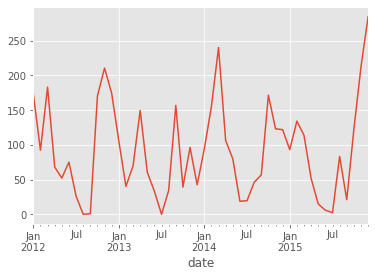

In [80]:
monthly_precip.plot()

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

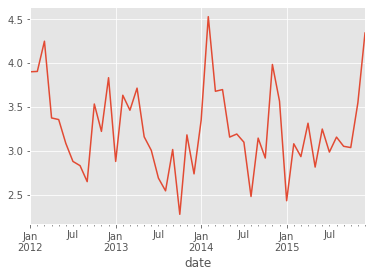

In [82]:
# resample by month and calculate wind speed mean
monthly_wind = df.resample('M').wind.mean()
monthly_wind.plot()

<AxesSubplot:xlabel='date'>

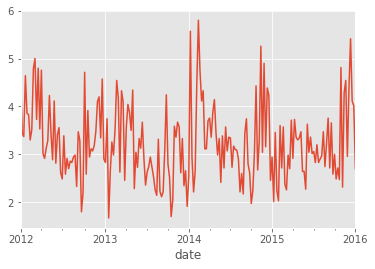

In [83]:
# resample by week and calculate wind speed mean
weekly_wind = df.resample('W').wind.mean()
weekly_wind.plot()

<AxesSubplot:xlabel='date'>

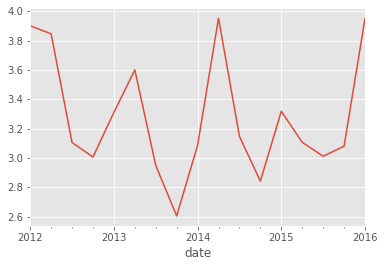

In [86]:
# resample by 3 months and calculate wind speed mean
monthly_wind = df.resample('3M').wind.mean()
monthly_wind.plot()



4. Which year-month combination is the windiest?


In [87]:
# resample by month and calculate wind speed mean
monthly_wind = df.resample('M').wind.mean()
monthly_wind.idxmax().strftime("%B %Y"), f'Mean wind {monthly_wind.max()}'

('February 2014', 'Mean wind 4.5285714285714285')

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [99]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,rainy
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,0
2012-01-02,10.9,10.6,2.8,4.5,rain,0,1
2012-01-03,0.8,11.7,7.2,2.3,rain,0,1
2012-01-04,20.3,12.2,5.6,4.7,rain,0,1
2012-01-05,1.3,8.9,2.8,6.1,rain,0,1


In [89]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [97]:
# resample by year and calculate sum of weather == 'sun'
df['sunny'] = df.weather.apply(lambda x: 1 if x == 'sun' else 0)
sunny_days = df.resample('Y').sunny.sum()
sunny_days.idxmax().strftime("%Y"), f'# sunny days: {sunny_days.max()}'

('2014', '# sunny days 211')

6. In which month does it rain the most?


In [98]:
# resample by month and calculate sum of rainy days giving month with most rainy days
df['rainy'] = df.weather.apply(lambda x: 1 if x == 'rain' else 0)
rainy_days = df.resample('M').rainy.sum()
rainy_days.idxmax().strftime("%B %Y"), f'# rainy days: {rainy_days.max()}'

('November 2012', '# rainy days: 25')

In [118]:
# rain = precip if weather == 'rain'
df['rain'] = np.where(df.weather == 'rain', df.precipitation, 0)
rain_sum = df.resample('M').rain.sum()
rain_sum.idxmax().strftime("%B %Y"), f'# total rain: {rain_sum.max()}'

('November 2012', '# total rain: 210.5')

7. Which month has the most number of days with a non-zero amount of precipitation?

In [119]:
# count days per month with 0 precipitation
df['zero_precip'] = np.where(df.precipitation == 0, 1, 0)
zero_precip_days = df.resample('M').zero_precip.sum()
zero_precip_days.idxmax().strftime("%B %Y"), f'# zero precip days: {zero_precip_days.max()}'

('August 2012', '# zero precip days: 31')

data.flights_20k()


In [120]:
df = data.flights_20k()

In [127]:
df.head()
df.set_index('date', inplace=True)

1. Convert any negative delays to 0.


In [128]:
# convert negative delays to 0
df.delay = df.delay.apply(lambda x: x if x >0 else 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


2. Which hour of the day has the highest average delay?


<AxesSubplot:xlabel='date'>

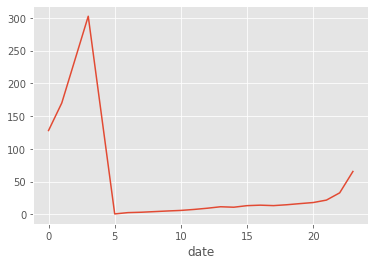

In [129]:
# sort by hour of day and calculate mean delay
df.groupby(df.index.hour).delay.mean().plot()

In [ ]:
# count days per month with 0 precipitation
df['zero_precip'] = np.where(df.precipitation == 0, 1, 0)
zero_precip_days = df.resample('M').zero_precip.sum()
zero_precip_days.idxmax().strftime("%B %Y"), f'# zero precip days: {zero_precip_days.max()}'

In [136]:
# sort by hour of day and calculate the max mean delay
delay_per_hour = df.groupby(df.index.hour).delay.mean()
f'hour : {delay_per_hour.idxmax()} has the highest mean delay of: {delay_per_hour.max()}'
#delay_per_hour.idxmax().strftime("%H"), delay_per_hour.mean().max()

'hour : 3 has the highest mean delay of: 302.5'

3. Does the day of the week make a difference in the delay amount?


<AxesSubplot:xlabel='Day of the Week', ylabel='Avg. Delay (min)'>

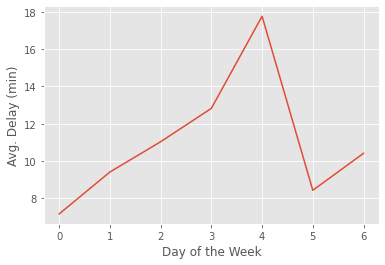

In [142]:
# sort by day of the week and calculate mean delay
df.groupby(df.index.dayofweek).delay.mean().plot(xlabel='Day of the Week', ylabel='Avg. Delay (min)')

4. Does the month make a difference in the delay amount?


<AxesSubplot:xlabel='Month', ylabel='Avg. Delay (min)'>

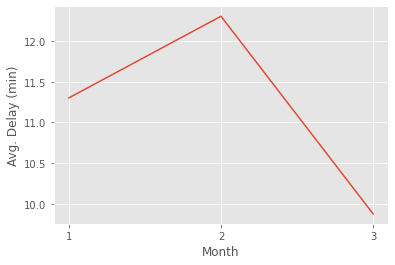

In [156]:
# sort by month and calculate mean delay
df.groupby(df.index.month).delay.mean().plot(xlabel='Month', ylabel='Avg. Delay (min)', xticks=[1,2,3])

Bonus

from vega_datasets import data
data.iowa_electricity()


In [228]:
df = data.iowa_electricity()
df.set_index('year', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-01-01 to 2017-01-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          51 non-null     object
 1   net_generation  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [229]:
df.sample(5)

,source,net_generation
year,,
2016-01-01,Nuclear Energy,4703
2008-01-01,Renewables,5070
2005-01-01,Nuclear Energy,4538
2003-01-01,Nuclear Energy,3988
2013-01-01,Nuclear Energy,5321


For each row, calculate the percentage of the year's total that energy source provided.


In [230]:
# map the year total to each year
df['year_total'] = df.index.map(df.net_generation.resample('YS').sum())
df['year_percent'] = df.net_generation / df.year_total  * 100
df.sample(5)

,source,net_generation,year_total,year_percent
year,,,,
2002-01-01,Fossil Fuels,35991,42528,84.628950
2014-01-01,Renewables,17452,56854,30.696169
2006-01-01,Fossil Fuels,37014,45473,81.397753
2013-01-01,Renewables,16476,56670,29.073584
2009-01-01,Nuclear Energy,4679,51859,9.022542


Lineplot of generation over time, color by source


In [231]:
df1 = df.reset_index()
df1.head()


,year,source,net_generation,year_total,year_percent
0,2001-01-01,Fossil Fuels,35361,40651,86.986790
1,2002-01-01,Fossil Fuels,35991,42528,84.628950
2,2003-01-01,Fossil Fuels,36234,42107,86.052200
3,2004-01-01,Fossil Fuels,36205,43236,83.738089
4,2005-01-01,Fossil Fuels,36883,44145,83.549666


<AxesSubplot:xlabel='year', ylabel='net_generation'>

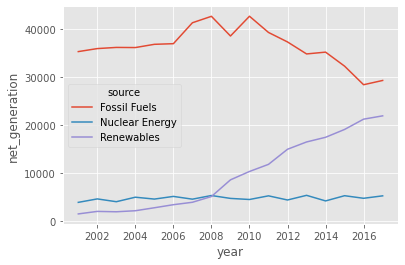

In [236]:
# make a sns lineplot of year vs net generation
sns.lineplot(x='year', y='net_generation', data=df1, hue='source')

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


In [242]:
# rename index to date
df.index.name = 'date'
#create column for year
df['year'] = df.index.year
df.head()

,source,net_generation,year_total,year_percent,year
date,,,,,
2001-01-01,Fossil Fuels,35361,40651,86.986790,2001
2002-01-01,Fossil Fuels,35991,42528,84.628950,2002
2003-01-01,Fossil Fuels,36234,42107,86.052200,2003
2004-01-01,Fossil Fuels,36205,43236,83.738089,2004
2005-01-01,Fossil Fuels,36883,44145,83.549666,2005


In [246]:
#create pivot table of year vs net generation
df_pivot = df.pivot_table(index='source', columns='year', values='net_generation')
df_pivot.head()

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


<AxesSubplot:xlabel='year', ylabel='net_generation'>

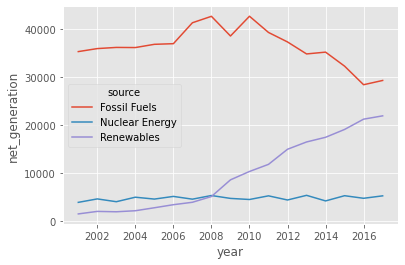

In [279]:
#make a lineplot for net generation vs year by source
sns.lineplot(x='year', y='net_generation', data=df1, hue='source')





Is the total generation increasing over time?


<AxesSubplot:xlabel='year', ylabel='year_total'>

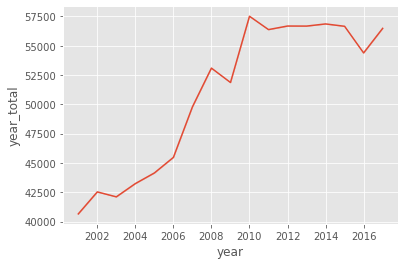

In [281]:
# make a lineplot of year vs total generation
sns.lineplot(x='year', y='year_total', data=df1)

In [277]:
# increasing until 2010

How would you control for increasing consumption over time when considering how much energy is coming from each source?
express each number as a % of the year's total

In [283]:
df_pivot

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


In [284]:
years = df_pivot.columns.tolist()

In [285]:
df_pivot[years]= df_pivot[years]/df_pivot[years].sum()
df_pivot

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,0.869868,0.846290,0.860522,0.837381,0.835497,0.813978,0.831472,0.804996,0.744712,0.743362,0.698249,0.659532,0.615370,0.620009,0.570473,0.522922,0.519318
Nuclear Energy,0.094782,0.107553,0.094711,0.114002,0.102798,0.112045,0.090783,0.099499,0.090225,0.077397,0.092512,0.076700,0.093894,0.073029,0.092546,0.086482,0.092322
Renewables,0.035350,0.046158,0.044767,0.048617,0.061706,0.073978,0.077745,0.095505,0.165063,0.179242,0.209239,0.263767,0.290736,0.306962,0.336981,0.390596,0.388360


BONUS 2:
1. Use the sf_temps dataset


In [287]:
df = data.sf_temps()
df.set_index('date', inplace=True)
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)


In [289]:
# split data into cold, cool, warm, and hot
df['cold'] = np.where(df.temp < 32, 1, 0)
df['cool'] = np.where((df.temp >= 32) & (df.temp < 50), 1, 0)
df['warm'] = np.where((df.temp >= 50) & (df.temp < 70), 1, 0)
df['hot'] = np.where(df.temp >= 70, 1, 0)


In [292]:
df.describe()

,temp,cold,cool,warm,hot
count,8759.000000,8759.0,8759.000000,8759.000000,8759.000000
mean,56.924112,0.0,0.129238,0.846558,0.024204
std,6.107079,0.0,0.335483,0.360434,0.153690
min,45.600000,0.0,0.000000,0.000000,0.000000
25%,52.300000,0.0,0.000000,1.000000,0.000000
50%,56.500000,0.0,0.000000,1.000000,0.000000
75%,60.700000,0.0,0.000000,1.000000,0.000000
max,72.200000,0.0,1.000000,1.000000,1.000000


In [291]:
#cut data into cold, cool, warm, and hot
df['qual_temp'] = pd.cut(df.temp, [0,32,50,70,100], labels=['cold','cool','warm','hot'])
df['qual_temp'].value_counts()

warm    7374
cool    1183
hot      202
cold       0
Name: qual_temp, dtype: int64

3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


In [322]:
#resample by month and calculate sum of qualitative temp
monthly_qual_temps =pd.DataFrame()
monthly_qual_temps['warm']=df.resample('M').warm.sum()
monthly_qual_temps['cool']=df.resample('M').cool.sum()
monthly_qual_temps['cold']=df.resample('M').cold.sum()
monthly_qual_temps['hot']=df.resample('M').hot.sum()
monthly_qual_temps['month']=monthly_qual_temps.index.map(lambda x: x.strftime('%B'))



In [320]:
monthly_qual_temps.head()

,warm,cool,cold,hot,month
date,,,,,
2010-01-31,353,391,0,0,January
2010-02-28,472,200,0,0,February
2010-03-31,635,108,0,0,March
2010-04-30,694,26,0,0,April
2010-05-31,744,0,0,0,May


In [324]:
#resample df to days calculate sum of qualitative temp
daily_qual_temps =pd.DataFrame()
daily_qual_temps['hot']=df.resample('D').hot.sum()
daily_qual_temps['warm']=df.resample('D').warm.sum()
daily_qual_temps['cool']=df.resample('D').cool.sum()
daily_qual_temps['cold']=df.resample('D').cold.sum()


In [325]:
daily_qual_temps.head()

,hot,warm,cool,cold
date,,,,
2010-01-01,0,9,15,0
2010-01-02,0,10,14,0
2010-01-03,0,10,14,0
2010-01-04,0,10,14,0
2010-01-05,0,10,14,0


In [326]:
# change each column to 1 if sum is greater than 0
daily_qual_temps['hot'] = np.where(daily_qual_temps.hot > 0, 1, 0)
daily_qual_temps['warm'] = np.where(daily_qual_temps.warm > 0, 1, 0)
daily_qual_temps['cool'] = np.where(daily_qual_temps.cool > 0, 1, 0)
daily_qual_temps['cold'] = np.where(daily_qual_temps.cold > 0, 1, 0)
daily_qual_temps.head()

,hot,warm,cool,cold
date,,,,
2010-01-01,0,1,1,0
2010-01-02,0,1,1,0
2010-01-03,0,1,1,0
2010-01-04,0,1,1,0
2010-01-05,0,1,1,0


In [332]:
# make a new df by grouping by month and summing the daily qual temps
monthly_qual_temps_by_day = daily_qual_temps.resample('M').sum()
monthly_qual_temps_by_day['month']=monthly_qual_temps_by_day.index.map(lambda x: x.strftime('%B'))
monthly_qual_temps_by_day.head()

,hot,warm,cool,cold,month
date,,,,,
2010-01-31,0,31,31,0,January
2010-02-28,0,28,28,0,February
2010-03-31,0,31,31,0,March
2010-04-30,0,30,11,0,April
2010-05-31,0,31,0,0,May


<AxesSubplot:title={'center':'temp occurences by month'}, xlabel='month', ylabel='Temp occurences'>

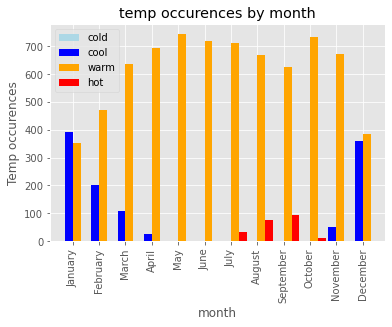

In [340]:
# plot monthly qual temps where cold is light-blue, cool is blue, warm is orange, and hot is red
monthly_qual_temps.plot(x='month', y=['cold','cool','warm','hot'], 
kind='bar', 
color=['lightblue','blue','orange','red'], 
width=1.2, 
ylabel='Temp occurences',
title='temp occurences by month')

<AxesSubplot:title={'center':'days with temp occurences by month'}, xlabel='month', ylabel='days'>

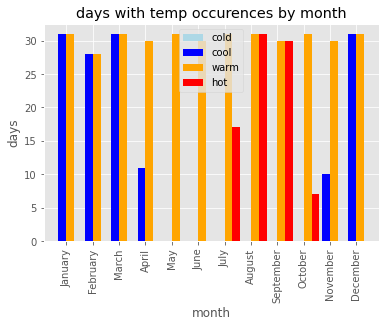

In [342]:
monthly_qual_temps_by_day.plot(x='month', y=['cold','cool','warm','hot'], 
kind='bar', 
color=['lightblue','blue','orange','red'], 
width=1.2, 
ylabel='days',
title='days with temp occurences by month')

4. Create pretty labels for time plots


In [337]:
#?

5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [343]:
# see above

Explore birdstrikes data:

In [344]:
df = data.birdstrikes()

In [345]:
df.head()

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Flight_Date                 10000 non-null  object 
 4   Aircraft__Airline_Operator  10000 non-null  object 
 5   Origin_State                10000 non-null  object 
 6   When__Phase_of_flight       10000 non-null  object 
 7   Wildlife__Size              10000 non-null  object 
 8   Wildlife__Species           10000 non-null  object 
 9   When__Time_of_day           10000 non-null  object 
 10  Cost__Other                 10000 non-null  int64  
 11  Cost__Repair                10000 non-null  int64  
 12  Cost__Total_$               10000 non-null  int64  
 13  Speed_IAS_in_knots          7164

In [347]:
df.describe()

,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
count,1.000000e+04,1.000000e+04,1.000000e+04,7164.000000
mean,4.242411e+02,3.630287e+03,4.054528e+03,153.535176
std,1.829822e+04,9.786997e+04,1.021353e+05,43.518503
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,130.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,140.000000
75%,0.000000e+00,0.000000e+00,0.000000e+00,170.000000
max,1.565354e+06,7.043545e+06,7.043545e+06,350.000000


In [352]:
df.Flight_Date.min(), df.Flight_Date.max()

('1/1/00 0:00', '9/9/99 0:00')

In [353]:
# convert Flight_Date to datetime
df.Flight_Date = pd.to_datetime(df.Flight_Date)

In [354]:
df.Flight_Date.min(), df.Flight_Date.max()

(Timestamp('1990-01-08 00:00:00'), Timestamp('2002-07-25 00:00:00'))

In [356]:
df.Flight_Date.describe()

/var/folders/f5/w0p7b4_j2kdg3kvlsz7nhtn40000gn/T/ipykernel_1953/2349436733.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.Flight_Date.describe()


count                   10000
unique                   3625
top       1999-10-19 00:00:00
freq                       16
first     1990-01-08 00:00:00
last      2002-07-25 00:00:00
Name: Flight_Date, dtype: object